<a href="https://colab.research.google.com/github/Raghu29121999/Melanoma-Cancer-Detection/blob/main/Raghavendra_Goud_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary library 
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from glob import glob


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Loading the data set of test and tarin
train_path="/content/gdrive/MyDrive/Train"
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Test")

In [4]:
# Counting number of images in each of the data set 
#Train
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
#Test
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
# initialisation 
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   data_dir_train,
   batch_size=batch_size,
   image_size=(img_height,img_width),
   label_mode='categorical',
   seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    label_mode='categorical',
    seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
#all different types of cancer
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


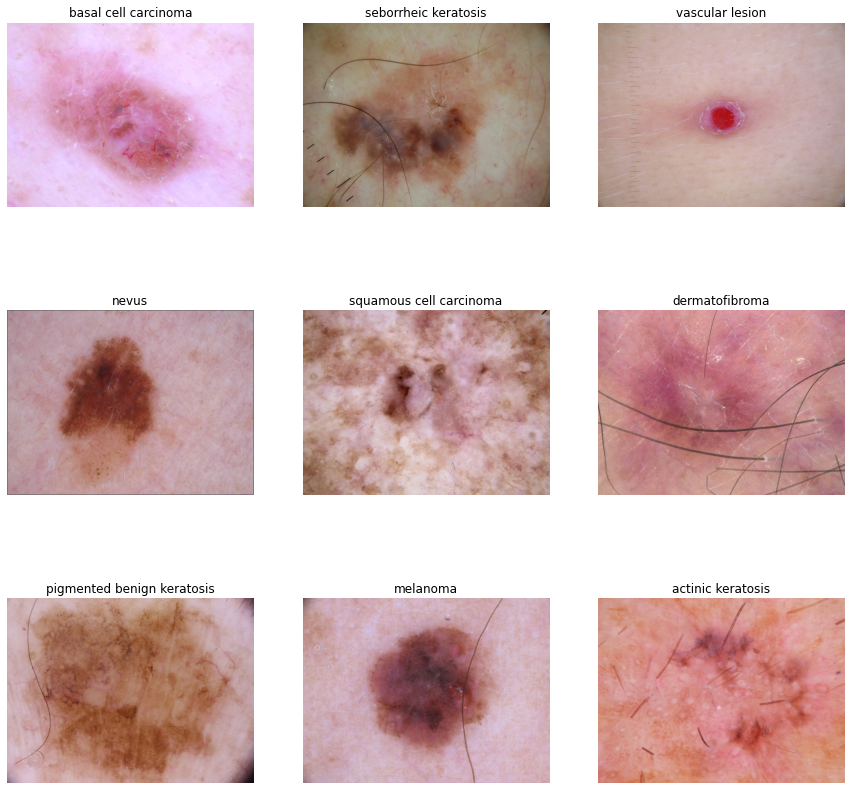

In [9]:
# Visualize the all the different types of cancers

import matplotlib.pyplot as plt
num=0
plt.figure(figsize=(15,15))
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
input_shape = (img_height,img_width,3)

model = Sequential() 
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())  
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [12]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [14]:
#training 1st model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 95ms/step - loss: 1.9334 - accuracy: 0.2868 - val_loss: 1.6412 - val_accuracy: 0.3960
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6267 - accuracy: 0.4180 - val_loss: 1.5157 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 1.4684 - accuracy: 0.4838 - val_loss: 1.4427 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3666 - accuracy: 0.5173 - val_loss: 1.3777 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.3082 - accuracy: 0.5268 - val_loss: 1.4722 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.2268 - accuracy: 0.5675 - val_loss: 1.4449 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.1772 - accuracy: 0.5753 - val_loss: 1.4597 - val_accuracy: 0.5168
Epoch 8/20
5

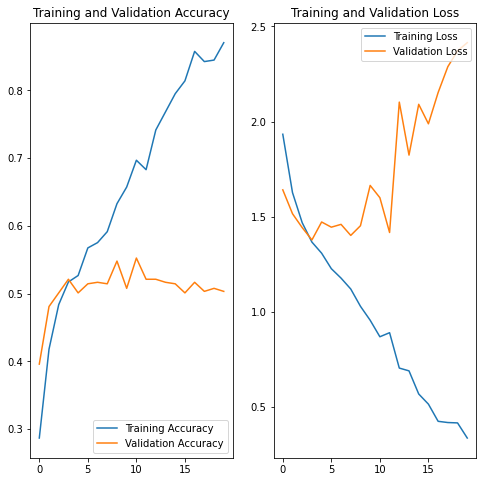

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#Data augumentation
rescale = tf.keras.Sequential([
  #Rescaling the RGB values between 0 to 1
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

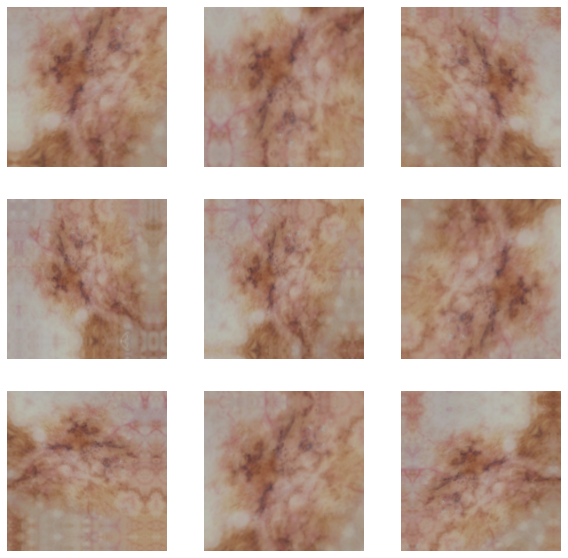

In [17]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_images = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_images[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

In [18]:

model2 = Sequential()                   

model2.add(data_augmentation)          
model2.add(rescale)                     

#First
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
#second
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

model2.add(layers.Dropout(0.25))
# third
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))
model2.add(layers.Dense(128,activation='relu'))
#Droping
model2.add(layers.Dropout(0.50))
model2.add(layers.Dense(len(class_names),activation='softmax'))


In [19]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20
56/56 [==============================] - 5s 53ms/step - loss: 2.6603 - accuracy: 0.1646 - val_loss: 2.0857 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 50ms/step - loss: 2.0333 - accuracy: 0.2271 - val_loss: 1.9223 - val_accuracy: 0.2617
Epoch 3/20
56/56 [==============================] - 3s 51ms/step - loss: 1.8944 - accuracy: 0.3025 - val_loss: 1.8220 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 1.8025 - accuracy: 0.3287 - val_loss: 1.7215 - val_accuracy: 0.3803
Epoch 5/20
56/56 [==============================] - 3s 50ms/step - loss: 1.7380 - accuracy: 0.3460 - val_loss: 1.6477 - val_accuracy: 0.4385
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.7106 - accuracy: 0.3828 - val_loss: 1.6478 - val_accuracy: 0.4273
Epoch 7/20
56/56 [==============================] - 3s 50ms/step - loss: 1.6558 - accuracy: 0.3984 - val_loss: 1.5965 - val_accuracy: 0.4541
Epoch 8/20
56

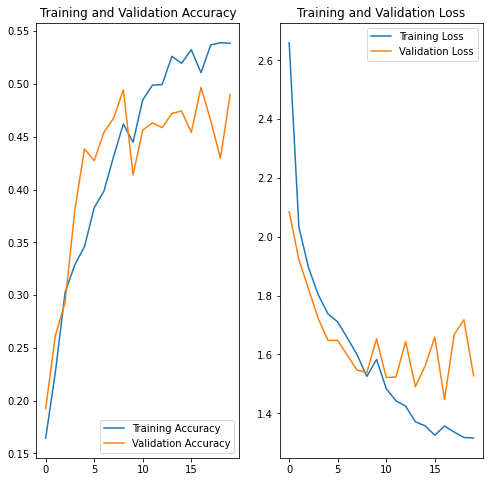

In [21]:
#accuracy graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<BarContainer object of 9 artists>

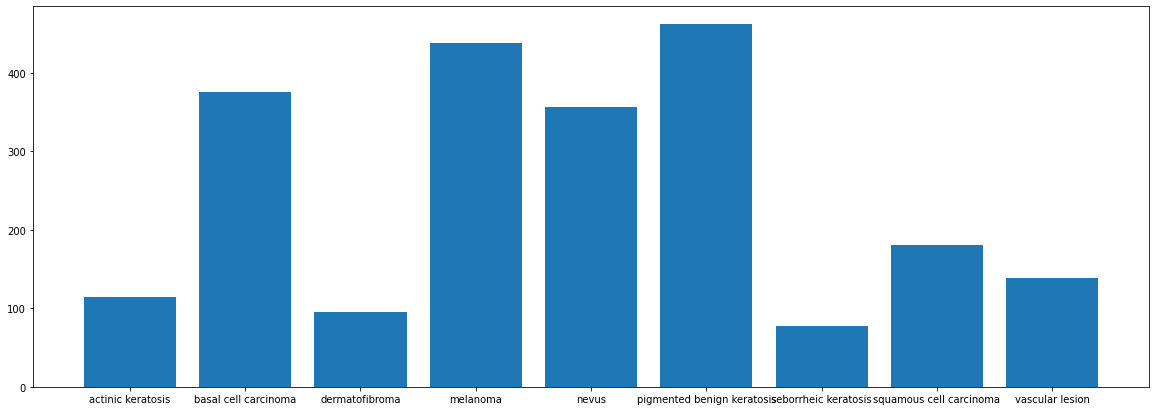

In [22]:
# Count 
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(20,7))
plt.bar(class_names,count)

In [23]:
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
 
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    

    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,basal cell carcinoma,376
1,seborrheic keratosis,77
2,vascular lesion,139
3,nevus,357
4,squamous cell carcinoma,181
5,dermatofibroma,95
6,pigmented benign keratosis,462
7,melanoma,438
8,actinic keratosis,114


In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import Augmentor
import os
import warnings
warnings.filterwarnings('ignore')
import keras
import glob



In [26]:

for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F20D032FA50>: 100%|██████████| 500/500 [00:59<00:00,  8.37 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F20D36F3390>: 100%|██████████| 500/500 [00:44<00:00, 11.28 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F20D062CC90>: 100%|██████████| 500/500 [00:51<00:00,  9.79 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F20D0649850>: 100%|██████████| 500/500 [00:45<00:00, 11.11 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F20D07A8C90>: 100%|██████████| 500/500 [00:43<00:00, 11.45 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F20D3762F50>: 100%|██████████| 500/500 [00:42<00:00, 11.68 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F20D37EDFD0>: 100%|██████████| 500/500 [00:44<00:00, 11.19 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7F20D0663DD0>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F20D0739390>: 100%|██████████| 500/500 [00:53<00:00,  9.40 Samples/s]


In [27]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [28]:
data_dir_train="/content/gdrive/MyDrive/Train/output" 

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,  
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical', 
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [29]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [30]:
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))
#Second
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))
#Third
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))
#Dropout
model3.add(layers.Dropout(0.50))
#Batch normalization
model3.add(layers.BatchNormalization())

#Dense
model3.add(layers.Dense(len(class_names),activation='softmax'))

In [31]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [32]:
epochs = 40
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/40
113/113 [==============================] - 29s 234ms/step - loss: 2.4541 - accuracy: 0.1994 - val_loss: 4.5105 - val_accuracy: 0.2078
Epoch 2/40
113/113 [==============================] - 20s 165ms/step - loss: 1.7904 - accuracy: 0.3944 - val_loss: 2.8472 - val_accuracy: 0.2622
Epoch 3/40
113/113 [==============================] - 19s 162ms/step - loss: 1.5863 - accuracy: 0.4622 - val_loss: 3.1916 - val_accuracy: 0.2256
Epoch 4/40
113/113 [==============================] - 21s 182ms/step - loss: 1.4548 - accuracy: 0.5028 - val_loss: 1.9486 - val_accuracy: 0.4211
Epoch 5/40
113/113 [==============================] - 19s 162ms/step - loss: 1.3557 - accuracy: 0.5386 - val_loss: 1.7727 - val_accuracy: 0.4433
Epoch 6/40
113/113 [==============================] - 19s 163ms/step - loss: 1.2912 - accuracy: 0.5533 - val_loss: 1.6328 - val_accuracy: 0.4478
Epoch 7/40
113/113 [==============================] - 19s 164ms/step - loss: 1.2389 - accuracy: 0.5692 - val_loss: 1.6389 - val_ac

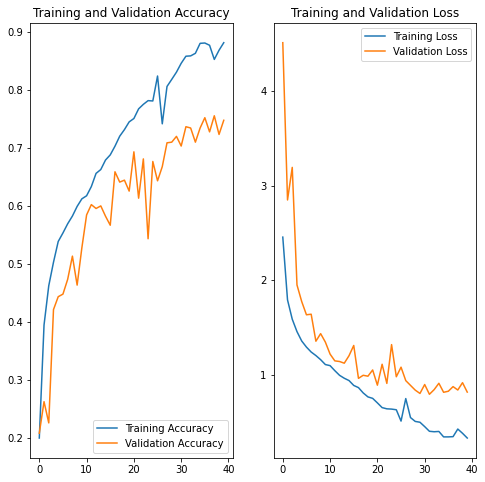

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

- Model Training accuracy ~ 0.8817
- Validation Accuracy is ~ 0.74
- Model accuracy increase by increasing adding more epochs 